# KHALED MAHMUD SUJON
## Diabetes Prediction
By
### Explainable AI(XAI) and Ml

## what is Diabetes??

Diabetes, also known as diabetes mellitus, is a chronic condition that affects how your body processes blood sugar (glucose). Glucose is vital for your health because it's an essential source of energy for cells and tissues. However, when you have diabetes, your body either doesn't produce enough insulin (a hormone that helps glucose enter cells) or can't effectively use the insulin it does produce. This leads to an accumulation of glucose in your bloodstream, causing high blood sugar levels.


**There are several types of diabetes:**

**Type 1 Diabetes:** This type occurs when your immune system mistakenly attacks and destroys the insulin-producing cells in your pancreas. People with type 1 diabetes need to take insulin injections or use an insulin pump to manage their blood sugar levels.

**Type 2 Diabetes**: In type 2 diabetes, your body becomes resistant to insulin or doesn't produce enough insulin to maintain normal blood sugar levels. This type is more common and is often linked to lifestyle factors such as obesity, lack of physical activity, and unhealthy eating habits. Type 2 diabetes can sometimes be managed through lifestyle changes like diet and exercise, along with medications if necessary.

 **Gestational Diabetes** : This type of diabetes develops during pregnancy and usually goes away after childbirth. However, women who have had gestational diabetes are at higher risk of developing type 2 diabetes later in life.


## Factors for prediction

**Pregnancies:** For predicting gestational diabetes, the number of pregnancies and previous history of gestational diabetes can be important factors. Women with a history of gestational diabetes are at higher risk of developing type 2 diabetes later in life.

**Glucose:** Blood glucose levels, particularly fasting glucose levels or HbA1c levels (a measure of average blood glucose levels over several months), are fundamental indicators of diabetes. High glucose levels are a key feature of diabetes and are used in diagnostic criteria.

**Blood Pressure:** Hypertension is a common comorbidity of diabetes and is associated with an increased risk of cardiovascular complications. Including blood pressure measurements can improve the accuracy of diabetes prediction models, especially for assessing cardiovascular risk.

 **Skin Thickness:** Although skin thickness itself may not directly predict diabetes, it can be relevant in insulin therapy management. For example, thicker skin may require adjustments in insulin injection techniques, which can impact blood glucose control.

**Insulin:** Insulin levels or insulin resistance measures can be valuable in predicting diabetes, especially in the context of insulin resistance syndrome (a precursor to type 2 diabetes). Insulin resistance is characterized by the body's reduced response to insulin, leading to elevated blood glucose levels.

**BMI (Body Mass Index):** Obesity and higher BMI are major risk factors for type 2 diabetes. Including BMI in predictive models helps assess the risk of diabetes associated with excess body weight.

**Diabetes Pedigree Function:** Family history of diabetes can significantly increase an individual's risk of developing diabetes. Incorporating family history data into predictive models can improve their accuracy, especially for identifying genetic predispositions to diabetes.

**Age:** Age is a critical factor in diabetes risk assessment, as the prevalence of diabetes increases with age. Including age-related parameters in predictive models helps account for age-related risk factors and tailor predictions to different age groups.

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



### Data Loading and Exploratory analysis

In [ ]:
data = pd.read_csv("diabetes2.csv")

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.corr().Outcome.sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


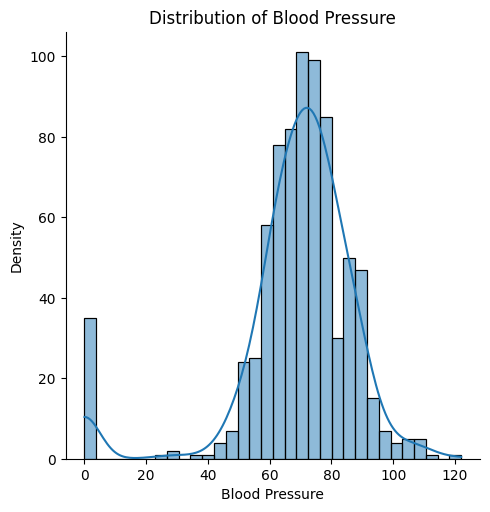

In [ ]:
# Plot a distribution plot for 'BloodPressure'
sns.displot(data=data, x='BloodPressure', kde=True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.show()

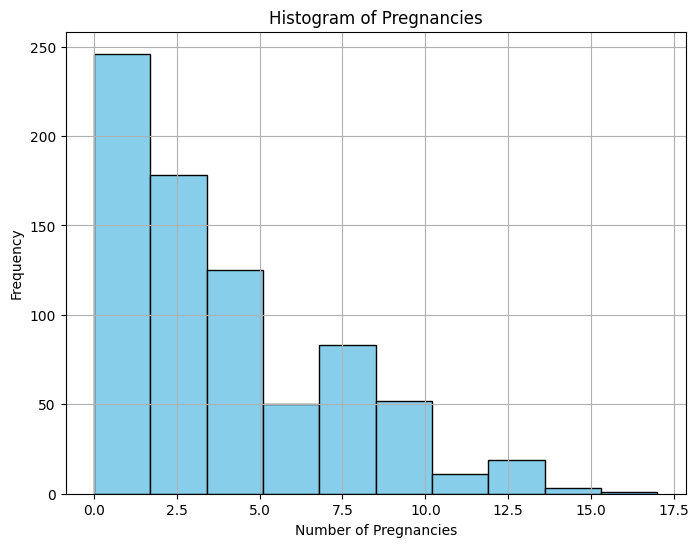

In [ ]:
# Plot a histogram for 'Pregnancies'
plt.figure(figsize=(8, 6))
plt.hist(data['Pregnancies'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Histogram of Pregnancies')
plt.grid(True)
plt.show()

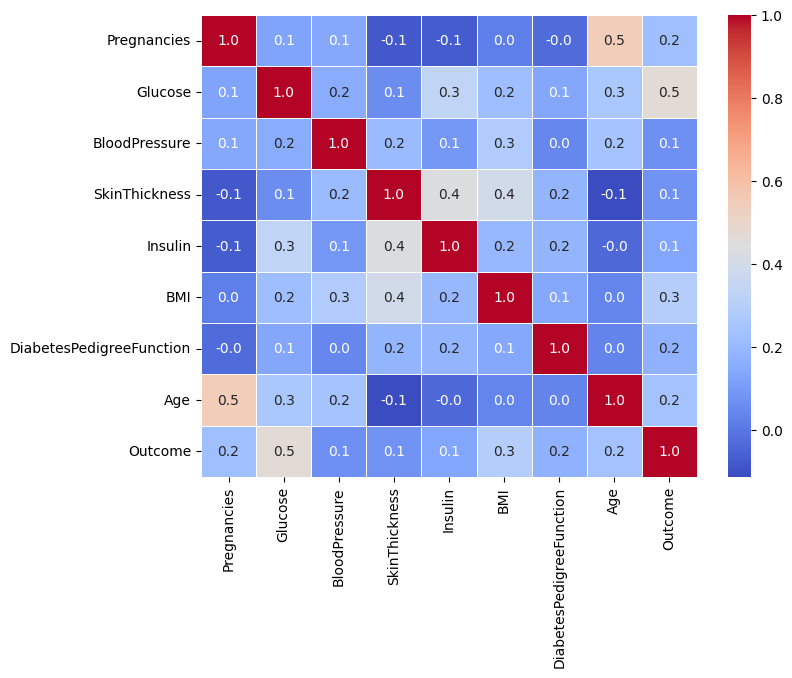

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, linewidths=0.5, fmt='.1f', ax=ax)
plt.show()


In [ ]:
# Age Distribution
fig = px.histogram(data, x="Age",
                   marginal="box",
                  )
fig.show()

In [ ]:
sns.countplot(data.Outcome, palette="PRGn")
plt.title("Outcome",fontsize=15)
plt.show()

In [ ]:
# Age distribution by Outcome 0
fig = px.histogram(data, x=data[data.Outcome==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen']
                  )
fig.show()

In [ ]:
# Age distribution by Outcome 1
fig = px.histogram(data, x=data[data.Outcome==1].Age,
                   marginal="box",
                   color_discrete_sequence=['pink']
                  )
fig.show()

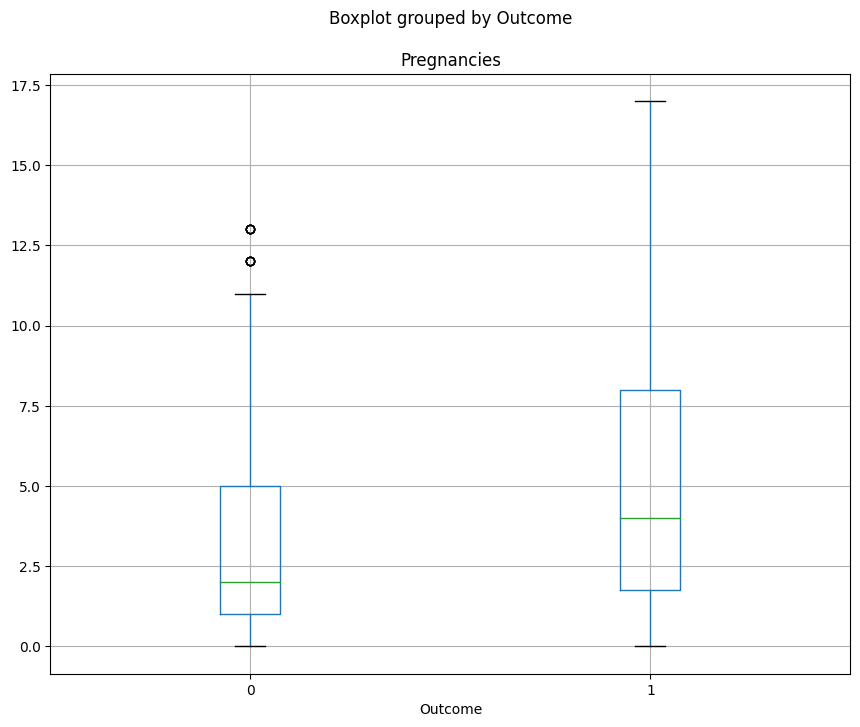

In [ ]:
data.boxplot(figsize=(10,8),column='Pregnancies',by ='Outcome')
plt.show()

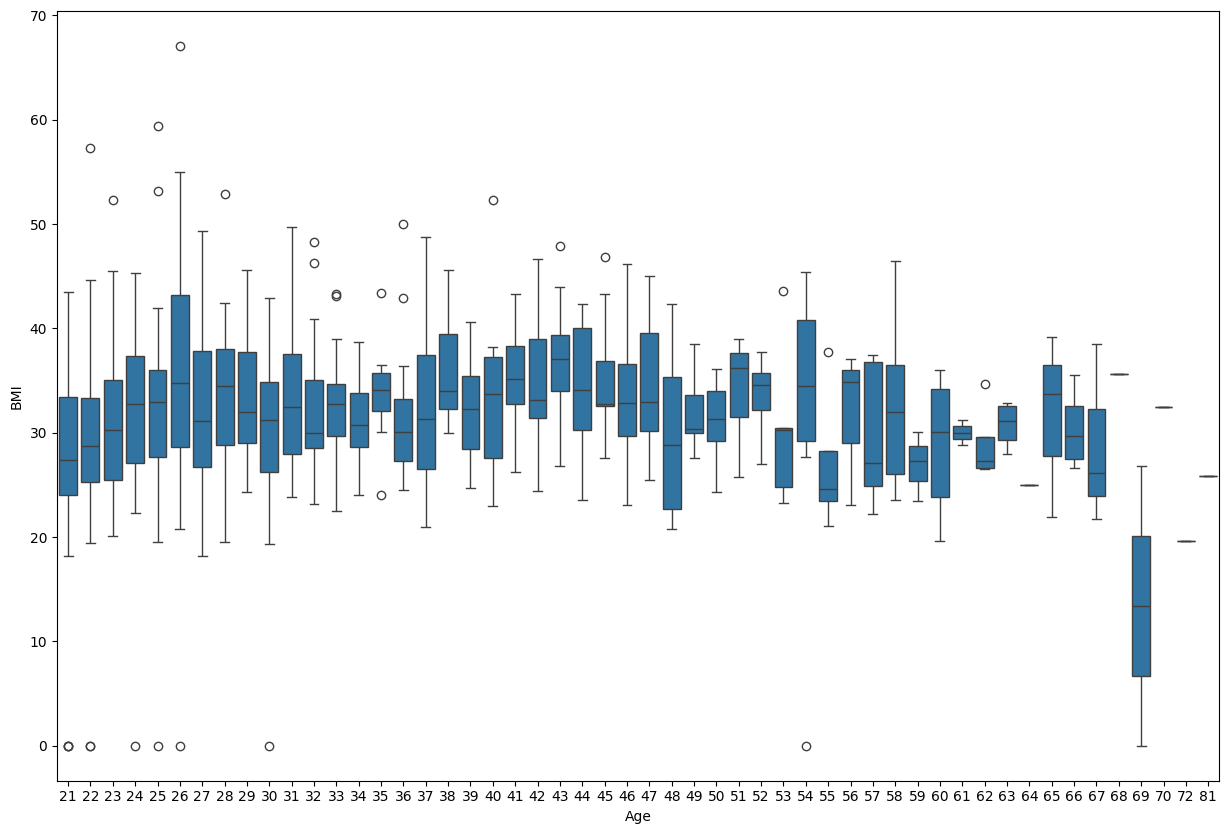

In [ ]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='Age', y='BMI', data=data)
plt.show()

### Data Preprocessing

In [ ]:
x = data.drop(['Outcome'], axis = 1)
y = data.loc[:,"Outcome"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=150)
# Fit
logreg.fit(x_train,y_train)
# Predict
predicted = logreg.predict(x_test)
print("Test accuracy: {} ".format(logreg.score(x_test, y_test)))

Test accuracy: 0.7913385826771654 


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predicted)
cf_matrix

array([[139,  18],
       [ 35,  62]])

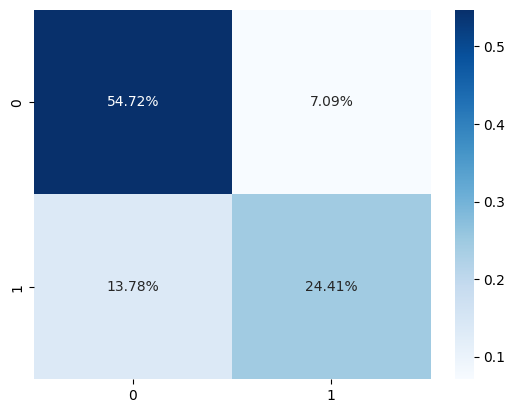

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
plt.show()

Random Forest Test accuracy: 75.20%


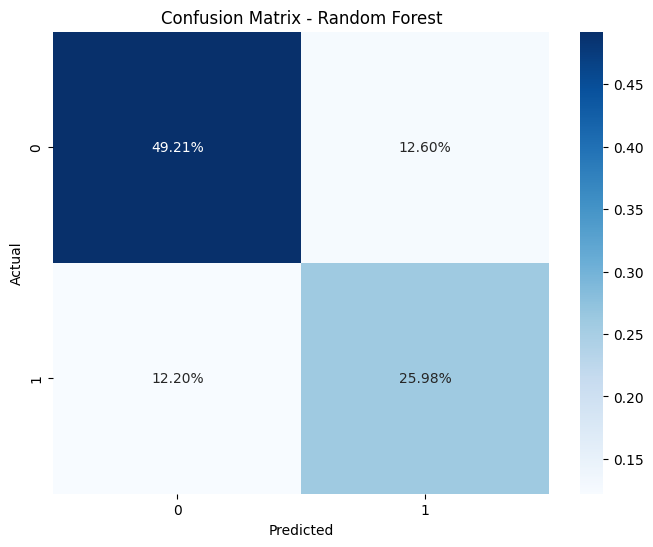

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Fit the model
rf_classifier.fit(x_train, y_train)

# Predict on the test set
rf_predicted = rf_classifier.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, rf_predicted)
print("Random Forest Test accuracy: {:.2f}%".format(accuracy * 100))

# Create a confusion matrix
cf_matrix_rf = confusion_matrix(y_test, rf_predicted)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_rf / np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


## Model Interpretability by Explainable Ai

In [ ]:
pip install shap


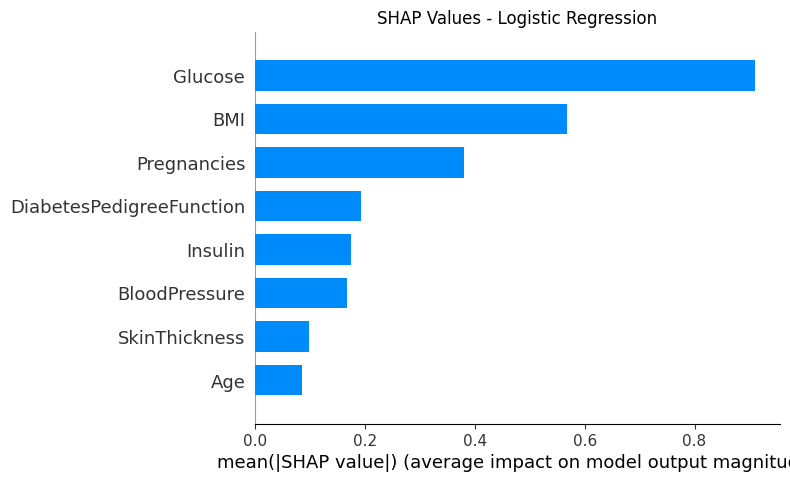

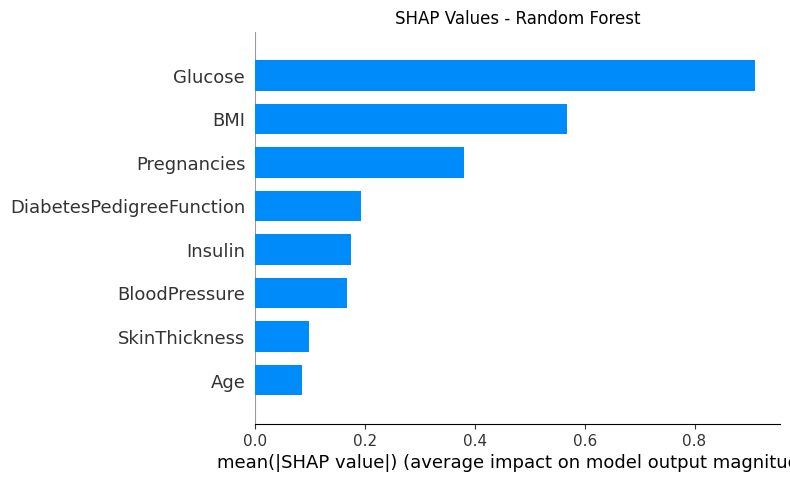

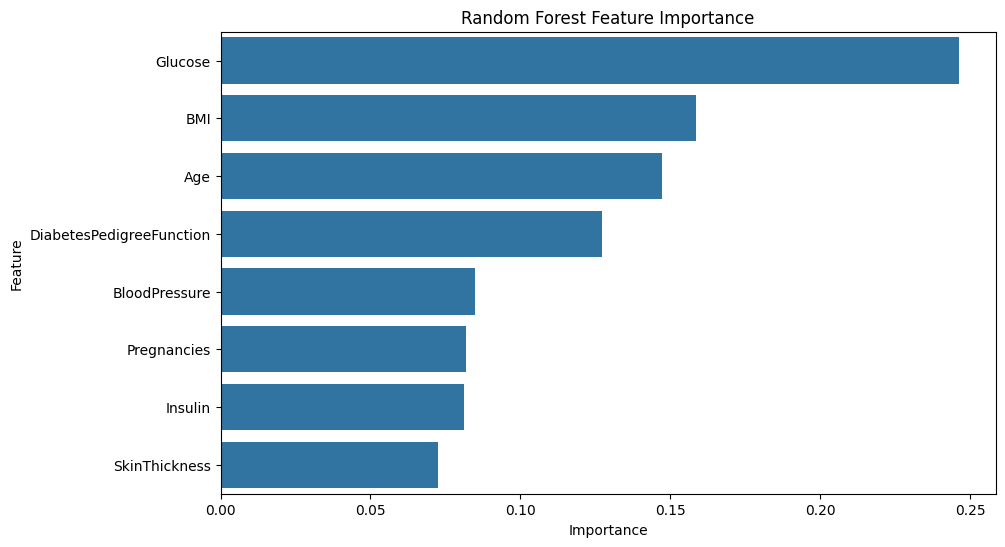

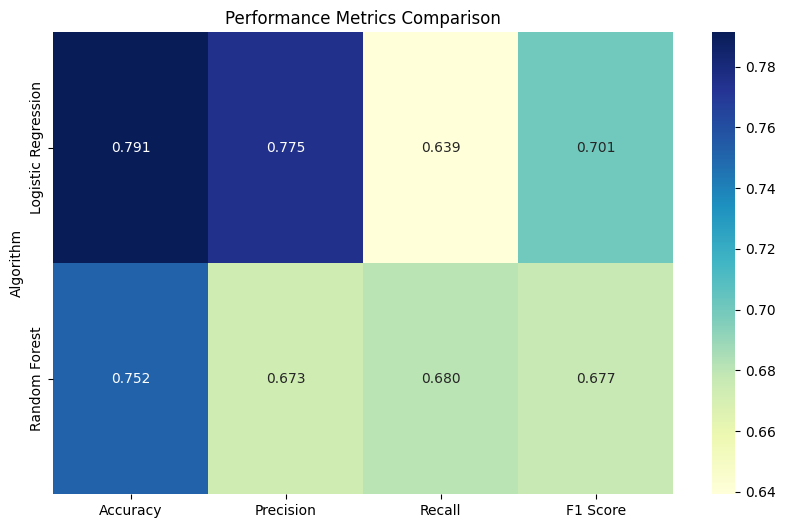

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import shap
# Logistic Regression
logreg = linear_model.LogisticRegression(max_iter=150)
logreg.fit(x_train, y_train)
predicted = logreg.predict(x_test)
lr_accuracy = accuracy_score(y_test, predicted)
lr_precision = precision_score(y_test, predicted)
lr_recall = recall_score(y_test, predicted)
lr_f1 = f1_score(y_test, predicted)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=123)
rf_classifier.fit(x_train, y_train)
rf_predicted = rf_classifier.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predicted)
rf_precision = precision_score(y_test, rf_predicted)
rf_recall = recall_score(y_test, rf_predicted)
rf_f1 = f1_score(y_test, rf_predicted)

# SHAP Values (Logistic Regression)
explainer = shap.Explainer(logreg, x_train)
shap_values_lr = explainer.shap_values(x_test)
shap.summary_plot(shap_values_lr, x_test, plot_type="bar", show=False)
plt.title('SHAP Values - Logistic Regression')
plt.show()

# SHAP Values (Random Forest)
explainer_rf = shap.Explainer(rf_classifier, x_train)
shap_values_rf = explainer.shap_values(x_test)
shap.summary_plot(shap_values_rf, x_test, plot_type="bar", show=False)
plt.title('SHAP Values - Random Forest')
plt.show()

# Feature Importance (Random Forest)
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

# Metrics DataFrame
metrics_data = {
    'Algorithm': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1 Score': [lr_f1, rf_f1]
}
metrics_df = pd.DataFrame(metrics_data)

# Plotting the metrics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.set_index('Algorithm'), annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Performance Metrics Comparison')
plt.show()


## XAI


XAI stands for eXplainable Artificial Intelligence, and it refers to the field of developing AI systems that can explain their decisions and actions in a human-understandable manner. This is essential for enhancing transparency, accountability, and trust in AI applications, especially in critical domains such as healthcare, finance, and law. SHAP (SHapley Additive exPlanations) is a specific method within XAI that provides explanations for individual predictions made by machine learning models. Here's a closer look at SHAP and its functionality:

# SHAP (SHapley Additive exPlanations)

  SHAP is based on game theory principles and the idea of Shapley values, which were originally developed to distribute payouts fairly among players in a cooperative game. In the context of machine learning, SHAP assigns each feature's contribution to a prediction, allowing us to understand the impact of individual features on the model's output.

## Functionality:

Feature Importance: SHAP provides a way to measure the importance of each feature in a predictive model. It calculates how much each feature contributes to the difference between the actual prediction and the average prediction, considering all possible combinations of features.

Local Explanations: SHAP can generate explanations for individual predictions, providing insights into why a particular prediction was made. This is especially valuable for understanding model behavior on specific data points and debugging model errors.

Global Interpretability: Beyond local explanations, SHAP can also provide insights into the overall behavior of a model across the entire dataset. It can identify which features have the most significant impact on model predictions globally.

Model Agnostic: One of the strengths of SHAP is its model-agnostic nature. It can be applied to various machine learning models, including tree-based models, linear models, support vector machines, and deep learning models. This flexibility makes SHAP widely applicable across different types of predictive models.

Visualizations: SHAP often uses visualizations such as SHAP summary plots, SHAP dependence plots, and SHAP force plots to represent feature contributions and make the explanations more interpretable for humans. These visualizations help users understand how each feature influences model predictions.

Fairness Analysis: SHAP can also be used to assess the fairness of machine learning models by analyzing the impact of different features on predictions across different demographic groups. This helps in detecting and mitigating biases in AI systems.

Use Cases:

Healthcare: In healthcare applications, SHAP can help explain why a model made a particular diagnosis or treatment recommendation based on patient data, providing clinicians with valuable insights for decision-making.